# Importing packages

In [67]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading Data

In [68]:
#Read train data and test data
raw_report = pd.read_csv('./input/report.csv')

# 重新命名欄位
raw_report = raw_report.rename(columns={"4": "FarmID", "5": "CowID", "6": "SpermID", "7": "MotherID", "9": "Parity", "10": "LactationDays", 
                                        "11": "MilkYield", "12": "LastParturitionDays", "14": "MonthAge", "16": "LastBreedingDate",
                                        "17": "LastSperm", "18": "BreedingTimes", "21": "FirstSperm"})

# 乳牛編號轉為字串
raw_report['CowID'] = raw_report['CowID'].astype(str)
raw_report.head()

,1,2,3,FarmID,CowID,SpermID,MotherID,8,Parity,LactationDays,...,LastParturitionDays,13,MonthAge,15,LastBreedingDate,LastSperm,BreedingTimes,19,20,FirstSperm
0,1,2013,3,A,52612,507H7173,96040545,2011/1/1 00:00,1,78.0,...,2013/1/1 00:00,2013/3/20 00:00,26,2013/3/21 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784
1,2,2013,4,A,52612,507H7173,96040545,2011/1/1 00:00,1,107.0,...,2013/1/1 00:00,2013/4/18 00:00,27,2013/4/19 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784
2,3,2013,5,A,52612,507H7173,96040545,2011/1/1 00:00,1,140.0,...,2013/1/1 00:00,2013/5/21 00:00,28,2013/5/22 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
3,4,2013,6,A,52612,507H7173,96040545,2011/1/1 00:00,1,175.0,...,2013/1/1 00:00,2013/6/25 00:00,29,2013/6/26 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
4,5,2013,7,A,52612,507H7173,96040545,2011/1/1 00:00,1,210.0,...,2013/1/1 00:00,2013/7/30 00:00,30,2013/7/31 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784


In [69]:
raw_report.shape

(37517, 21)

In [70]:
# 配種日期，精液是否有空值
print("NullFirstBreedingDateShape: ")
print(raw_report[raw_report['20'].isnull()].shape)
print("NullLastBreedingDateShape: ")
print(raw_report[raw_report['LastBreedingDate'].isnull()].shape)
print("NullFirstSpermShape: ")
print(raw_report[raw_report['FirstSperm'].isnull()].shape)
print("NullLastSpermShape: ")
print(raw_report[raw_report['LastSperm'].isnull()].shape)

NullFirstBreedingDateShape: 
(1431, 21)
NullLastBreedingDateShape: 
(1536, 21)
NullFirstSpermShape: 
(1431, 21)
NullLastSpermShape: 
(1536, 21)


In [71]:
# 將乳量欄位移動到最右邊
m = raw_report.pop('MilkYield')
raw_report.insert(raw_report.shape[1], 'MilkYield', m)
raw_report.head()

,1,2,3,FarmID,CowID,SpermID,MotherID,8,Parity,LactationDays,...,13,MonthAge,15,LastBreedingDate,LastSperm,BreedingTimes,19,20,FirstSperm,MilkYield
0,1,2013,3,A,52612,507H7173,96040545,2011/1/1 00:00,1,78.0,...,2013/3/20 00:00,26,2013/3/21 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784,29.4
1,2,2013,4,A,52612,507H7173,96040545,2011/1/1 00:00,1,107.0,...,2013/4/18 00:00,27,2013/4/19 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784,27.8
2,3,2013,5,A,52612,507H7173,96040545,2011/1/1 00:00,1,140.0,...,2013/5/21 00:00,28,2013/5/22 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784,9.0
3,4,2013,6,A,52612,507H7173,96040545,2011/1/1 00:00,1,175.0,...,2013/6/25 00:00,29,2013/6/26 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784,13.0
4,5,2013,7,A,52612,507H7173,96040545,2011/1/1 00:00,1,210.0,...,2013/7/30 00:00,30,2013/7/31 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784,13.2


In [72]:
# 如果前次分娩日期為空，填入最近分娩日期
raw_report['19'].fillna(raw_report['LastParturitionDays'], inplace=True)
raw_report['19']

0          2013/1/1 00:00
1          2013/1/1 00:00
2          2013/1/1 00:00
3          2013/1/1 00:00
4          2013/1/1 00:00
               ...       
37512    2012/11/16 00:00
37513    2012/11/16 00:00
37514    2012/11/16 00:00
37515    2012/11/16 00:00
37516    2012/11/16 00:00
Name: 19, Length: 37517, dtype: object

In [73]:
# 將最近分娩日期，採樣日期，最後配種日期，前次分娩日期，第一次配種日期從字串轉為日期格式
raw_report['LastParturitionDays'] = pd.to_datetime(raw_report['LastParturitionDays'], format='%Y/%m/%d')
raw_report['13'] = pd.to_datetime(raw_report['13'], format='%Y/%m/%d')
raw_report['LastBreedingDate'] = pd.to_datetime(raw_report['LastBreedingDate'], format='%Y/%m/%d')
raw_report['19'] = pd.to_datetime(raw_report['19'], format='%Y/%m/%d')
raw_report['20'] = pd.to_datetime(raw_report['20'], format='%Y/%m/%d')

In [74]:
# 欄19改為分娩間隔(最近分娩日期減去前次分娩日期)
raw_report['19'] = raw_report['LastParturitionDays'] - raw_report['19']
raw_report['19'] = raw_report['19'].dt.days
raw_report = raw_report.rename(columns={"19": "ParturitionInterval"})

In [75]:
# 欄20改為配種間隔(最後配種日期減去第一次配種日期)
raw_report['20'] = raw_report['LastBreedingDate'] - raw_report['20']
raw_report['20'] = raw_report['20'].dt.days
raw_report = raw_report.rename(columns={"20": "BreedingInterval"})

In [76]:
# 欄12改為採樣日期減去最近分娩日期
raw_report['LastParturitionDays'] = raw_report['13'] - raw_report['LastParturitionDays']
# 將天數的日期格式轉回整數
raw_report['LastParturitionDays'] = raw_report['LastParturitionDays'].dt.days

In [77]:
raw_report.head()

,1,2,3,FarmID,CowID,SpermID,MotherID,8,Parity,LactationDays,...,13,MonthAge,15,LastBreedingDate,LastSperm,BreedingTimes,ParturitionInterval,BreedingInterval,FirstSperm,MilkYield
0,1,2013,3,A,52612,507H7173,96040545,2011/1/1 00:00,1,78.0,...,2013-03-20,26,2013/3/21 00:00,2015-05-05,507H11621,1,0.0,791.0,501H8784,29.4
1,2,2013,4,A,52612,507H7173,96040545,2011/1/1 00:00,1,107.0,...,2013-04-18,27,2013/4/19 00:00,2015-05-05,507H11621,1,0.0,791.0,501H8784,27.8
2,3,2013,5,A,52612,507H7173,96040545,2011/1/1 00:00,1,140.0,...,2013-05-21,28,2013/5/22 00:00,2015-05-05,507H11621,2,0.0,791.0,501H8784,9.0
3,4,2013,6,A,52612,507H7173,96040545,2011/1/1 00:00,1,175.0,...,2013-06-25,29,2013/6/26 00:00,2015-05-05,507H11621,2,0.0,791.0,501H8784,13.0
4,5,2013,7,A,52612,507H7173,96040545,2011/1/1 00:00,1,210.0,...,2013-07-30,30,2013/7/31 00:00,2015-05-05,507H11621,2,0.0,791.0,501H8784,13.2


In [78]:
print(raw_report[raw_report['LastBreedingDate'].isnull()].shape)

(1536, 21)


In [79]:
raw_report.shape

(37517, 21)

In [80]:
# 乳量欄位不為空者切為訓練資料
train_report = raw_report[raw_report['MilkYield'].notna()]
train_report.shape

(33254, 21)

In [81]:
# 乳量欄位為空者切為測試資料
test_report = raw_report[raw_report['MilkYield'].isna()]
test_report.shape

(4263, 21)

In [82]:
train_report.head()

,1,2,3,FarmID,CowID,SpermID,MotherID,8,Parity,LactationDays,...,13,MonthAge,15,LastBreedingDate,LastSperm,BreedingTimes,ParturitionInterval,BreedingInterval,FirstSperm,MilkYield
0,1,2013,3,A,52612,507H7173,96040545,2011/1/1 00:00,1,78.0,...,2013-03-20,26,2013/3/21 00:00,2015-05-05,507H11621,1,0.0,791.0,501H8784,29.4
1,2,2013,4,A,52612,507H7173,96040545,2011/1/1 00:00,1,107.0,...,2013-04-18,27,2013/4/19 00:00,2015-05-05,507H11621,1,0.0,791.0,501H8784,27.8
2,3,2013,5,A,52612,507H7173,96040545,2011/1/1 00:00,1,140.0,...,2013-05-21,28,2013/5/22 00:00,2015-05-05,507H11621,2,0.0,791.0,501H8784,9.0
3,4,2013,6,A,52612,507H7173,96040545,2011/1/1 00:00,1,175.0,...,2013-06-25,29,2013/6/26 00:00,2015-05-05,507H11621,2,0.0,791.0,501H8784,13.0
4,5,2013,7,A,52612,507H7173,96040545,2011/1/1 00:00,1,210.0,...,2013-07-30,30,2013/7/31 00:00,2015-05-05,507H11621,2,0.0,791.0,501H8784,13.2


In [83]:
test_report.head()

,1,2,3,FarmID,CowID,SpermID,MotherID,8,Parity,LactationDays,...,13,MonthAge,15,LastBreedingDate,LastSperm,BreedingTimes,ParturitionInterval,BreedingInterval,FirstSperm,MilkYield
479,480,2019,1,A,52631,501H9952,97040152,2011/3/17 00:00,4,435.0,...,2019-01-10,94,2019/1/15 00:00,2019-02-03,551HO00657,6,454.0,393.0,614HO07276,NaN
741,742,2019,2,A,52640,501H9952,96040567,2011/4/1 00:00,4,13.0,...,2019-02-11,94,2019/2/12 00:00,2019-02-28,551HO00695,0,591.0,0.0,551HO00695,NaN
742,743,2019,3,A,52640,501H9952,96040567,2011/4/1 00:00,4,35.0,...,2019-03-05,95,2019/3/6 00:00,2019-02-28,551HO00695,1,591.0,0.0,551HO00695,NaN
743,744,2019,4,A,52640,501H9952,96040567,2011/4/1 00:00,4,70.0,...,2019-04-09,96,2019/4/11 00:00,2019-02-28,551HO00695,1,591.0,0.0,551HO00695,NaN
744,745,2019,5,A,52640,501H9952,96040567,2011/4/1 00:00,4,98.0,...,2019-05-07,97,2019/5/9 00:00,2019-02-28,551HO00695,1,591.0,0.0,551HO00695,NaN


In [84]:
train_ID = train_report['1']
test_ID = test_report['1']

# Drop the Id columns in training and testing data
train_report.drop('1', axis = 1, inplace = True)
test_report.drop('1', axis = 1, inplace = True)

# 去除資料年份
train_report.drop('2', axis = 1, inplace = True)
test_report.drop('2', axis = 1, inplace = True)

# 去除資料月份
train_report.drop('3', axis = 1, inplace = True)
test_report.drop('3', axis = 1, inplace = True)

# 有月齡就不需要出生日期
train_report.drop('8', axis = 1, inplace = True)
test_report.drop('8', axis = 1, inplace = True)

# 去除採樣日期
train_report.drop('13', axis = 1, inplace = True)
test_report.drop('13', axis = 1, inplace = True)

# 去除檢測日期
train_report.drop('15', axis = 1, inplace = True)
test_report.drop('15', axis = 1, inplace = True)

# 去除最後配種日期
train_report.drop('LastBreedingDate', axis = 1, inplace = True)
test_report.drop('LastBreedingDate', axis = 1, inplace = True)

print('The shape of train_report:', train_report.shape)
print('The shape.of test_report:', test_report.shape)

The shape of train_report: (33254, 14)
The shape.of test_report: (4263, 14)


In [85]:
train_report.head()

,FarmID,CowID,SpermID,MotherID,Parity,LactationDays,LastParturitionDays,MonthAge,LastSperm,BreedingTimes,ParturitionInterval,BreedingInterval,FirstSperm,MilkYield
0,A,52612,507H7173,96040545,1,78.0,78.0,26,507H11621,1,0.0,791.0,501H8784,29.4
1,A,52612,507H7173,96040545,1,107.0,107.0,27,507H11621,1,0.0,791.0,501H8784,27.8
2,A,52612,507H7173,96040545,1,140.0,140.0,28,507H11621,2,0.0,791.0,501H8784,9.0
3,A,52612,507H7173,96040545,1,175.0,175.0,29,507H11621,2,0.0,791.0,501H8784,13.0
4,A,52612,507H7173,96040545,1,210.0,210.0,30,507H11621,2,0.0,791.0,501H8784,13.2


In [86]:
test_report.head()

,FarmID,CowID,SpermID,MotherID,Parity,LactationDays,LastParturitionDays,MonthAge,LastSperm,BreedingTimes,ParturitionInterval,BreedingInterval,FirstSperm,MilkYield
479,A,52631,501H9952,97040152,4,435.0,435.0,94,551HO00657,6,454.0,393.0,614HO07276,NaN
741,A,52640,501H9952,96040567,4,13.0,13.0,94,551HO00695,0,591.0,0.0,551HO00695,NaN
742,A,52640,501H9952,96040567,4,35.0,35.0,95,551HO00695,1,591.0,0.0,551HO00695,NaN
743,A,52640,501H9952,96040567,4,70.0,70.0,96,551HO00695,1,591.0,0.0,551HO00695,NaN
744,A,52640,501H9952,96040567,4,98.0,98.0,97,551HO00695,1,591.0,0.0,551HO00695,NaN


# Data Preprocessing

----
Data Preprocessing（資料前處理），這應該可以說是最需要耐心的部份。<br>

在這邊大致可分為兩部份，前半部份算是一些對資料的觀察、分析(EDA)，後半部主要是針對缺失值及非數值類資料的處理。<br>
而重點應該是在後半部份，因為至少要當缺失值及字串類資料處理好時，我們才能將資料送進 model。

---

### Exploratory Data Analysis (EDA)

In [87]:
# 乳量
train_report['MilkYield'].describe()

count    33254.000000
mean        23.991659
std          8.742980
min          0.000000
25%         18.000000
50%         23.400000
75%         30.000000
max         61.000000
Name: MilkYield, dtype: float64

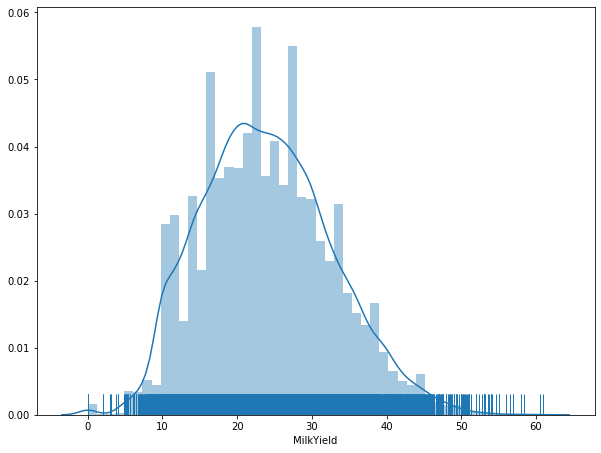

In [88]:
#histogram
f, ax = plt.subplots(figsize=(10, 7.5))
sns.distplot(train_report['MilkYield'], rug=True)

In [89]:
#skewness and kurtosis
print("Skewness: {:.2f}".format(train_report['MilkYield'].skew()))
print("Kurtosis: {:.2f}".format(train_report['MilkYield'].kurt()))

Skewness: 0.31
Kurtosis: -0.16


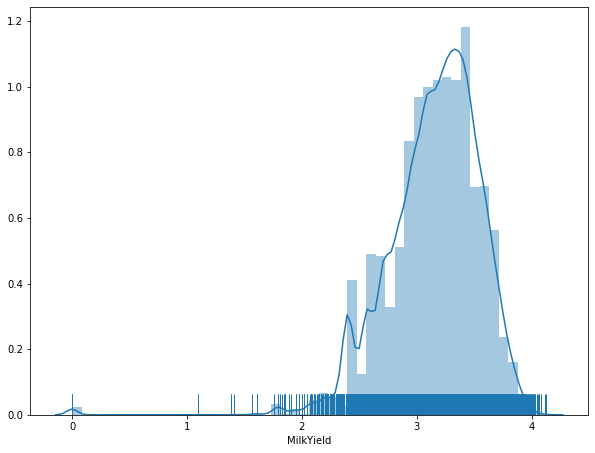

In [90]:
log_MilkYield = np.log1p(train_report['MilkYield'])
# Take y=log(1+x) on 'MilkYield'

#histogram
f, ax = plt.subplots(figsize=(10, 7.5))
sns.distplot(log_MilkYield, rug=True)

----
我們也可以將每一個 feature 之間的線型相關係數以熱圖的形式表現出來。<br>
顏色愈淺的就代表正相關性愈強，顏色愈深就代表負相關性愈強。<br>

---

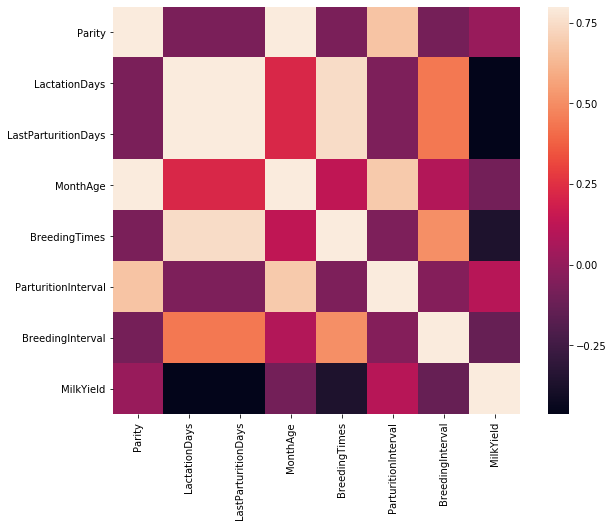

In [91]:
#correlation matrix
corrmat = train_report.corr()
f, ax = plt.subplots(figsize=(10, 7.5))
sns.heatmap(corrmat, vmax=.8, square=True)

### Missing Data Processing

----
這裡可以用 pandas 的 isna() 方法查看有缺失值的欄位。<br>
我們將有缺失值的欄位統整由多到少排列出來，可以看到第35列缺失值數量已經為0，因此有缺失值的欄位共有34個。<br>

---

In [92]:
# 先將乳量獨立出來
trainMilkYield = train_report['MilkYield']
testMilkYield = test_report['MilkYield']

#Drop the MilkYield column in training data
train_report.drop('MilkYield', axis = 1, inplace = True)
test_report.drop('MilkYield', axis = 1, inplace = True)

#Concatenate training dataframe and testing dataframe anlog axis_0
df = pd.concat([train_report, test_report])

In [93]:
#Detect missing data
total = df.isna().sum(axis = 0).sort_values(ascending = False)
percent = df.isna().sum(axis = 0).sort_values(ascending = False)/raw_report.shape[0]

missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(35)

,Total,Percent
MotherID,3584,0.095530
BreedingInterval,1536,0.040941
LastSperm,1536,0.040941
FirstSperm,1431,0.038143
SpermID,876,0.023349
ParturitionInterval,1,0.000027
LastParturitionDays,1,0.000027
LactationDays,1,0.000027
BreedingTimes,0,0.000000
MonthAge,0,0.000000


----
我們知道目前資料類型有分為數值型與非數值型，我們可以先將這兩種不同型態的資料區分出來，各別對其缺失值做處理。<br>
可用 select_dtypes(include=None, exclude=None) 將我們要的資料類型抽取出來。<br>
若需要數值型，我們就讓 include = np.number。<br>
若需要的資料是屬於字串類，我們就讓 include = 'object'<br>

這裡我們先處理數值型的缺失資料。<br>

---

In [94]:
#Extract data type of numbers from features
df_num = df.select_dtypes(include = np.number)

num_total = df_num.isna().sum(axis = 0).sort_values(ascending = False)
num_percent = df_num.isna().sum(axis = 0).sort_values(ascending = False)/df.shape[0]

num_missing_data = pd.concat([num_total, num_percent], axis = 1, keys = ['Total', 'Percent'])
num_missing_data.head(12)

,Total,Percent
BreedingInterval,1536,0.040941
ParturitionInterval,1,0.000027
LastParturitionDays,1,0.000027
LactationDays,1,0.000027
BreedingTimes,0,0.000000
MonthAge,0,0.000000
Parity,0,0.000000


----
我們再把數值類帶有缺失值的特徵重新做一次線型相關的熱圖。<br>
這次可以再更仔細的看一下每一個 feature 之間的相關性如何。<br>

---

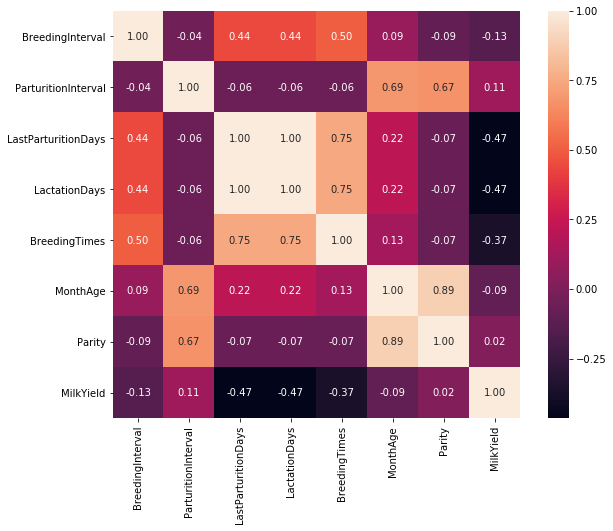

In [95]:
num_mis_feat = train_report[['BreedingInterval', 'ParturitionInterval', 'LastParturitionDays', 'LactationDays', 'BreedingTimes', 
                          'MonthAge', 'Parity']]

num_mis_df = pd.concat([num_mis_feat, trainMilkYield], axis = 1)

corrmat_Num_Mis = num_mis_df.corr()
f, ax = plt.subplots(figsize=(10, 7.5))
sns.heatmap(corrmat_Num_Mis, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

In [96]:
# 根據熱圖分析，我們去除掉相關性較小的胎次
df.drop('Parity', axis = 1, inplace = True)

----
這邊將缺失值以平均數填入。

---

In [97]:
df['BreedingInterval'] = df.groupby("MonthAge")['BreedingInterval'].transform(lambda x: x.fillna(x.mean()))

In [98]:
df[['BreedingInterval']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37517 entries, 0 to 37484
Data columns (total 1 columns):
BreedingInterval    37517 non-null float64
dtypes: float64(1)
memory usage: 586.2 KB


In [99]:
df[df['ParturitionInterval'].isna() == True][['BreedingInterval', 'LastParturitionDays', 'LactationDays', 'BreedingTimes', 'MonthAge']].head(10)

,BreedingInterval,LastParturitionDays,LactationDays,BreedingTimes,MonthAge
16713,82.203804,NaN,NaN,0,24


In [100]:
df['ParturitionInterval'].fillna(value=df['ParturitionInterval'].mean(), inplace=True)
df['LastParturitionDays'].fillna(value=df['LastParturitionDays'].mean(), inplace=True)
df['LactationDays'].fillna(value=df['LactationDays'].mean(), inplace=True)

----
接下來我們要處理字串型態資料欄位的缺失值。<br>
先用 select_dtypes() 將字串型資料取出。<br>
再將有缺失值特徵的欄位統整列出。

---

In [101]:
#Extract data type of object from features
df_obj = df.select_dtypes(include = 'object')

obj_total = df_obj.isna().sum(axis = 0).sort_values(ascending = False)
obj_percent = df_obj.isna().sum(axis = 0).sort_values(ascending = False)/df.shape[0]

obj_missing_data = pd.concat([obj_total, obj_percent], axis = 1, keys = ['Total', 'Percent'])
obj_missing_data.head(25)

,Total,Percent
MotherID,3584,0.095530
LastSperm,1536,0.040941
FirstSperm,1431,0.038143
SpermID,876,0.023349
CowID,0,0.000000
FarmID,0,0.000000


----
給定條件將有缺失值的欄位用 index 列出來，方便用來複製貼上。

---

In [102]:
obj_missing_data[obj_missing_data.Total != 0].index

Index(['MotherID', 'LastSperm', 'FirstSperm', 'SpermID'], dtype='object')

----
接下來我們要來看母親乳牛編號特徵。

---

In [103]:
df[['MotherID']].describe()

,MotherID
count,33933
unique,1266
top,外購
freq,2231


----
用 describe() 觀察之。<br>
發現外購比例最高，加上缺失資料，故判定不具參考價值。

---

In [104]:
# df['MotherID'] = df['MotherID'].fillna(df['MotherID'].mode()[0])
df.drop('MotherID', axis = 1, inplace = True)

----
最後配種精液這項特徵暫時以樣本數最多的代替缺失值。

---

In [105]:
df[['LastSperm']].describe()

,LastSperm
count,35981
unique,201
top,001HO12927
freq,1347


In [106]:
df['LastSperm'] = df['LastSperm'].fillna(df['LastSperm'].mode()[0])

----
第一次配種精液比照最後配種精液辦理。

---

In [107]:
df[['FirstSperm']].describe()

,FirstSperm
count,36086
unique,216
top,200H4779
freq,1686


In [108]:
df['FirstSperm'] = df['FirstSperm'].fillna(df['FirstSperm'].mode()[0])

----
父親牛精液編號外購比例最高，比照母親乳牛編號，我們認定這是沒用的特徵，刪除之。

---

In [109]:
df[['SpermID']].describe()

,SpermID
count,36641
unique,343
top,外購
freq,1950


In [110]:
df.drop('SpermID', axis = 1, inplace = True)

----
到目前為止，缺失值的資料已經全部補上。<br>
在處理缺失值時，上面的基本原則是先想辦法補值，不要輕易 drop 掉一個 feature。<br>

除非是那些明顯無用的 feature 可以先 drop。<br>
不然的話可以先試著補值，待在做模型訓練時，再來考慮 feature 的增刪。<br>

由於做模型訓練應該會是個反覆的實驗過程，除了參數的調整以外，我們還會考慮到是否需要增加或減少 feature，來讓模型學得更好。<br>
屆時我們可以再依照我們對資料本身的理解做增刪的動作。<br>

以下我們再檢查一次缺失值是否已經完全補完:

---

In [111]:
df.isna().sum(axis = 0).sort_values(ascending = False).head()

FirstSperm             0
BreedingInterval       0
ParturitionInterval    0
BreedingTimes          0
LastSperm              0
dtype: int64

In [112]:
df.head()

,FarmID,CowID,LactationDays,LastParturitionDays,MonthAge,LastSperm,BreedingTimes,ParturitionInterval,BreedingInterval,FirstSperm
0,A,52612,78.0,78.0,26,507H11621,1,0.0,791.0,501H8784
1,A,52612,107.0,107.0,27,507H11621,1,0.0,791.0,501H8784
2,A,52612,140.0,140.0,28,507H11621,2,0.0,791.0,501H8784
3,A,52612,175.0,175.0,29,507H11621,2,0.0,791.0,501H8784
4,A,52612,210.0,210.0,30,507H11621,2,0.0,791.0,501H8784


# Encoding and Feature Scaling (Data Normalization)

### Label Encoding

----
先將數值型與字串型資料的特徵預備好，以供複製貼上。

---

In [113]:
col_num = df.select_dtypes(include = np.number).columns
col_obj = df.select_dtypes(include = 'object').columns

print('col_num: ', col_num)
print('col_obj: ', col_obj)

col_num:  Index(['LactationDays', 'LastParturitionDays', 'MonthAge', 'BreedingTimes',
       'ParturitionInterval', 'BreedingInterval'],
      dtype='object')
col_obj:  Index(['FarmID', 'CowID', 'LastSperm', 'FirstSperm'], dtype='object')


### Feature Scaling

----
我們來查看數值型特徵的偏度(skewness)。

---

In [114]:
from scipy import stats
from scipy.stats import norm, skew

num_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[num_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
BreedingTimes,1.834887
MonthAge,1.477721
BreedingInterval,1.467041
LastParturitionDays,1.132602
LactationDays,1.132602
ParturitionInterval,0.469138


----
以 Box-Cox Transform 來降低偏度。

有關 Box-Cox Transform 的描述可以參考：<br>

http://onlinestatbook.com/2/transformations/box-cox.html<br>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html<br>


---

In [115]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #df[feat] += 1
    df[feat] = boxcox1p(df[feat], lam)
    #df[skewed_features] = np.log1p(df[skewed_features])
    
#df[skewed_features] = np.log1p(df[skewed_features])

There are 6 skewed numerical features to Box Cox transform


In [116]:
skewed_feats = df[num_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MonthAge,0.467930
BreedingTimes,0.405690
ParturitionInterval,-0.102513
BreedingInterval,-0.482645
LastParturitionDays,-0.662895
LactationDays,-0.662895


----
接下來我們做對數值型特徵做 feature scaling。

---

In [117]:
from sklearn.preprocessing import scale

for i in num_feats:
    df[i] = scale(df[i])

----
要注意，做 feature scaling 之前，要先把偏度過大的 feature 做一些降低偏度的轉換。<br>

當某 feature 偏度大時代表該 feature 的資料分佈會有離群值(outlier)的現象，而離群值(outlier)會對一般 scaling 的方法產生不好的影響。<br>
因此我們應當先以 Box-Cox 或其他可降低偏度的轉換，將偏度降低，再做 scaling。<br>

關於 outlier 對 scaling 的影響可參考以下這篇：<br>

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

---

### One-Hot Encoding

----
使用 get_dummies 做 one-hot encoding。

---

In [118]:
df = pd.get_dummies(df)

In [119]:
df.head()

,LactationDays,LastParturitionDays,MonthAge,BreedingTimes,ParturitionInterval,BreedingInterval,FarmID_A,FarmID_B,FarmID_C,CowID_1051813,...,FirstSperm_7H9754,FirstSperm_7H9900,FirstSperm_7H9925,FirstSperm_7H9961,FirstSperm_H01,FirstSperm_H02,FirstSperm_J5H54028,FirstSperm_JP5H54028,FirstSperm_T222,FirstSperm_TW1HO00521
0,-0.712043,-0.712043,-1.382600,-0.311497,-1.065656,1.678725,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.392072,-0.392072,-1.290571,-0.311497,-1.065656,1.678725,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.107121,-0.107121,-1.201295,0.304421,-1.065656,1.678725,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.138674,0.138674,-1.114598,0.304421,-1.065656,1.678725,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.345907,0.345907,-1.030324,0.304421,-1.065656,1.678725,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modeling

----
先將 training data 和 testing data 拆開。<br>

以 training data 來完成 modeling 即訓練。<br>
最後再將 testing data 送進訓練完的 model 來查看結果。

---

In [120]:
print('The shape of df:', df.shape)

The shape of df: (37517, 2417)


In [121]:
df_train = df.iloc[:33254,:]
df_test = df.iloc[33254:,:]

In [122]:
print('The shape of df_train:', df_train.shape)
print('The shape of df_test:', df_test.shape)

The shape of df_train: (33254, 2417)
The shape of df_test: (4263, 2417)


----
不要忘記，還需要再將 validation set 給切分出來。<br>

---

In [123]:
from sklearn.model_selection import train_test_split

# x_train, x_valid, y_train, y_valid = train_test_split(df_train, log_MilkYield, test_size=0.2, random_state= 12, shuffle=True)
x_train, x_test, y_train, y_test = train_test_split(df_train, trainMilkYield, test_size=0.2, random_state= 34)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state= 34)

In [124]:
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)
print('x_valid', x_valid.shape)
print('y_valid', y_valid.shape)
print('df_test', df_test.shape, '\n')

x_train (23942, 2417)
y_train (23942,)
x_test (6651, 2417)
y_test (6651,)
x_valid (2661, 2417)
y_valid (2661,)
df_test (4263, 2417) 



----
XGBoost：

---

In [125]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [126]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))   

In [62]:
model_xgb = XGBRegressor(
                    objective= 'reg:squarederror',
                    eval_metric='rmse',
                    gamma = 0.1,
                    min_child_weight= 3,
                    max_depth= 6,
                    subsample= 0.8,
                    colsample_bytree= 0.8,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=1000,
                    nthread=4,
                    scale_pos_weight=1,
                    reg_alpha=0.05,                           
                    seed=88,
                    early_stopping_rounds=10,
                    eval_set=[(x_valid, y_valid)])

In [63]:
model_xgb.fit(x_train, y_train)
xgb_train_pred_v = model_xgb.predict(x_valid)
print(rmsle(y_valid, xgb_train_pred_v))
xgb_train_pred_t = model_xgb.predict(x_test)
print(rmsle(y_test, xgb_train_pred_t))
xgb_pred = model_xgb.predict(df_test)

5.0421815170396895
5.104679962454721


Text(0.5, 0, 'Xgboost Feature Importance')

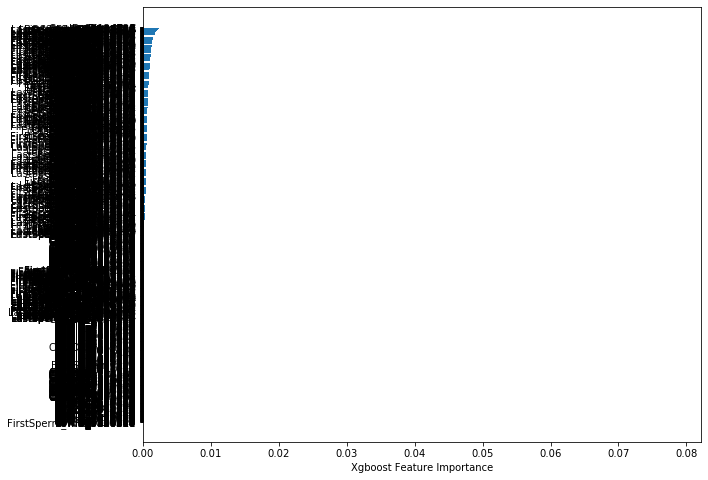

In [64]:
sorted_idx = model_xgb.feature_importances_.argsort()
plt.figure(figsize=(10,8))
plt.barh(df.columns[sorted_idx], model_xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

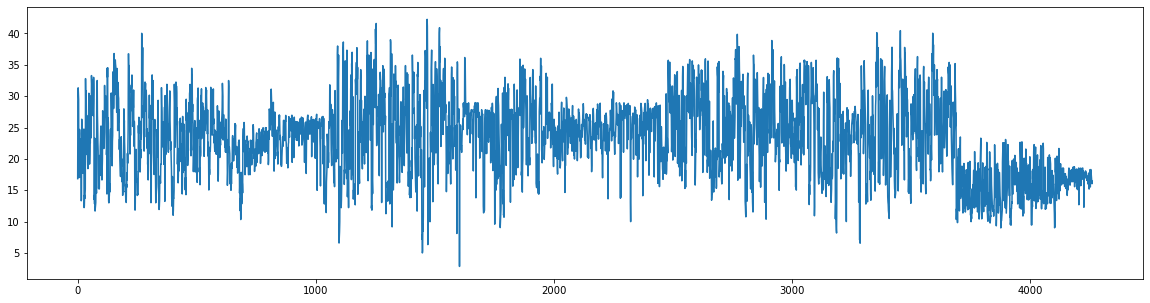

In [65]:
plt.figure(figsize=(20,5))
plt.plot(xgb_pred)

----
 GridSearchCV：

---

In [70]:
model_xgb = XGBRegressor(
                    objective= 'reg:squarederror',
                    eval_metric='rmse',
                    gamma = 0.1,
                    min_child_weight= 3,
                    max_depth= 6,
                    subsample= 0.8,
                    colsample_bytree= 0.8,
                    tree_method='exact',
                    learning_rate=0.1,
                    n_estimators=1000,
                    nthread=4,
                    scale_pos_weight=1,
                    reg_alpha=0.05,                           
                    seed=88,
                    early_stopping_rounds=10,
                    eval_set=[(x_valid, y_valid)])

In [71]:
'''
    'max_depth':[3,5,7,9],
    'min_child_weight':[1,3,5,7],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'n_estimators':[50, 100, 200, 500,1000],
    'learning_rate':[0.1,0.01,0.001],
    'n_estimators': [300,500,800,1000,1200]
'''

parameters = {
     'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
}

gsearch = GridSearchCV(model_xgb, param_grid=parameters, scoring='neg_mean_squared_error', cv=3, verbose=1)
gsearch.fit(x_train,y_train)
print('Best Params:{0}'.format(gsearch.best_params_))
print('Best Score:{0}'.format(np.sqrt(-gsearch.best_score_)))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 106.3min finished


Best Params:{'reg_alpha': 1}
Best Score:0.2937174488309583


----
RandomizedSearchCV：

---

In [127]:
import time

model_xgb = XGBRegressor(
                    objective= 'reg:squarederror',
                    eval_metric='rmse',
                    gamma = 0.1,
                    min_child_weight= 3,
                    max_depth= 5,
                    subsample= 0.8,
                    colsample_bytree= 0.8,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=1000,
                    nthread=4,
                    scale_pos_weight=1,
                    reg_alpha=0.05,                           
                    seed=88,
                    early_stopping_rounds=10,
                    eval_set=[(x_valid, y_valid)])

param_grid = {
    'max_depth':[3,5,7,9],
    'min_child_weight':[1,3,5,7],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'n_estimators':[50, 100, 200, 500,1000],
    'learning_rate':[0.1,0.01,0.001],
    'n_estimators': [1000]
}

rs_xgb = RandomizedSearchCV(model_xgb, param_grid, n_iter=10,
                            verbose=2,  cv=2,
                            scoring='neg_mean_squared_error', refit=False, random_state=88)
print("Randomized search..")
search_time_start = time.time()
rs_xgb.fit(x_train, y_train)
print("Randomized search time:", time.time() - search_time_start)

best_score = np.sqrt(-rs_xgb.best_score_)
best_params = rs_xgb.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
best_params

Randomized search..
Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] subsample=0.6, reg_alpha=1, n_estimators=1000, min_child_weight=3, max_depth=3, learning_rate=0.001, gamma=0.1, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.6, reg_alpha=1, n_estimators=1000, min_child_weight=3, max_depth=3, learning_rate=0.001, gamma=0.1, colsample_bytree=0.7, total= 3.2min
[CV] subsample=0.6, reg_alpha=1, n_estimators=1000, min_child_weight=3, max_depth=3, learning_rate=0.001, gamma=0.1, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s


[CV]  subsample=0.6, reg_alpha=1, n_estimators=1000, min_child_weight=3, max_depth=3, learning_rate=0.001, gamma=0.1, colsample_bytree=0.7, total= 3.2min
[CV] subsample=0.9, reg_alpha=0.01, n_estimators=1000, min_child_weight=5, max_depth=7, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, reg_alpha=0.01, n_estimators=1000, min_child_weight=5, max_depth=7, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total= 5.2min
[CV] subsample=0.9, reg_alpha=0.01, n_estimators=1000, min_child_weight=5, max_depth=7, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, reg_alpha=0.01, n_estimators=1000, min_child_weight=5, max_depth=7, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total= 5.2min
[CV] subsample=0.7, reg_alpha=1e-05, n_estimators=1000, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, reg_alpha=1e-05, n_estimators=1000, min_child_weight=1, max_depth=9, learning_rate=0.01, gamm

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 109.5min finished


{'subsample': 0.8,
 'reg_alpha': 0.1,
 'n_estimators': 1000,
 'min_child_weight': 3,
 'max_depth': 7,
 'learning_rate': 0.1,
 'gamma': 0.0,
 'colsample_bytree': 0.8}

In [128]:
model_xgb = XGBRegressor(
                    objective= 'reg:squarederror',
                    eval_metric='rmse',
                    gamma = 0.0,
                    min_child_weight= 3,
                    max_depth= 7,
                    subsample= 0.8,
                    colsample_bytree= 0.8,
                    tree_method='exact',
                    learning_rate=0.1,
                    n_estimators=1000,
                    nthread=4,
                    scale_pos_weight=1,
                    reg_alpha=0.1,                           
                    seed=88,
                    #predictor='gpu_predictor',
                    early_stopping_rounds=10,
                    eval_set=[(x_valid, y_valid)])

In [131]:
model_xgb.fit(x_train, y_train)
xgb_train_pred_v = model_xgb.predict(x_valid)
print(rmsle(y_valid, xgb_train_pred_v))
xgb_train_pred_t = model_xgb.predict(x_test)
print(rmsle(y_test, xgb_train_pred_t))
xgb_pred = model_xgb.predict(df_test)

4.962883363069025
5.0087455757120525


Text(0.5, 0, 'Xgboost Feature Importance')

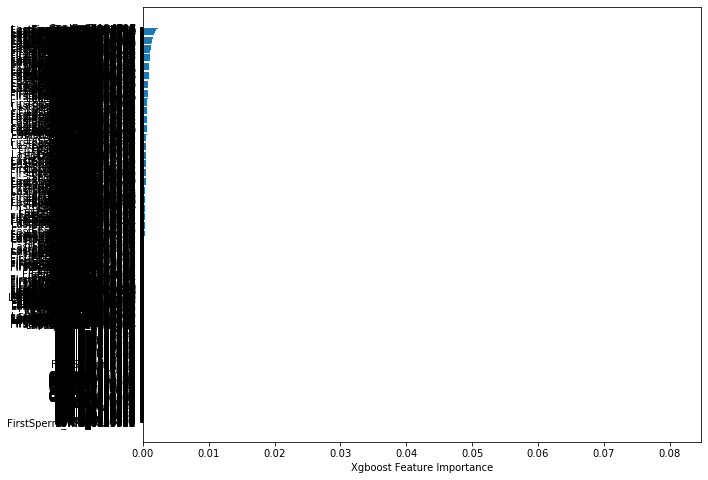

In [133]:
sorted_idx = model_xgb.feature_importances_.argsort()
plt.figure(figsize=(10,8))
plt.barh(df.columns[sorted_idx], model_xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

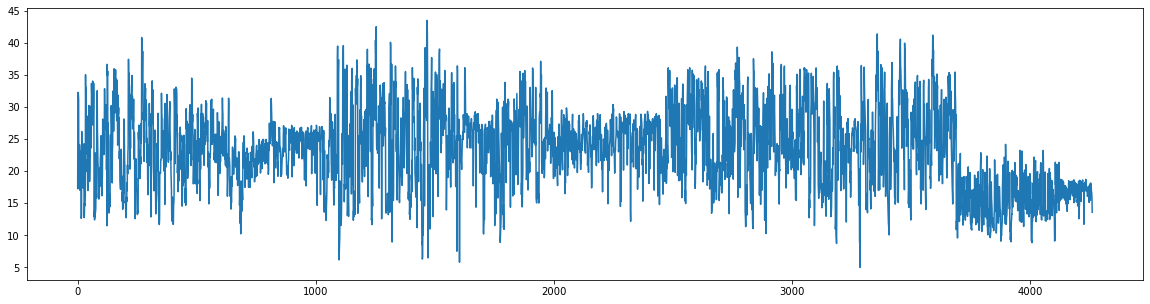

In [134]:
plt.figure(figsize=(20,5))
plt.plot(xgb_pred)

----
再把我們預測出來的資料依照 sample_submission.csv 的格式輸出成 csv 檔就可以上傳到 kaggle 囉！

---

In [135]:
sub = pd.read_csv('./submission.csv')
test_submission = pd.DataFrame({'ID':sub['ID'], '11': xgb_pred})
test_submission.to_csv('./submission_XGB3.csv', index = False)